### CREATING A MODEL TO PREDICT INFLATION RATES

Importing important data analytics and visualization libraries.

In [3]:
!conda install -c anaconda seaborn -y #sometimes seaborn doesn't install properly
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: #sometimes seaborn doesn't install properly


Importing beautifulsoup responsible for pulling data out of HTML adn XML files and beautifying
and urlopen which opens the URL.

In [4]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

Specifying website and extracting HTML.

In [14]:
url = 'https://www.centralbank.go.ke/inflation-rates' # do not include the last dash(/) in your URL
html_doc = urlopen(url)

Running the HTML doc though beautiful soup to get a nested data stracture.

In [15]:
soup = BeautifulSoup(html_doc, 'lxml')

You can explore the document a little bit before cleaning by looking at things like 
1. titles - < title > 
2. links - 'a'
3. rows - 'tr-
4. column headers - 'th' 
 etc.

In [16]:
title = soup.title
print(title)

<title>Inflation Rates | CBK</title>


In [18]:
text = soup.get_text()
#print(text)

In [20]:
# extracting links use the find_all beautiful soup fundtion
all_links = soup.find_all('a')

for link in all_links:
    #print(link.get('href'))
    

SyntaxError: unexpected EOF while parsing (<ipython-input-20-0d11547b0027>, line 6)

In [21]:
rows = soup.find_all('tr')
print(rows[:10])

[<tr>
<th class="header sort" data-class="expand" style="">Year</th><th class="header sort" style="">Month</th><th class="header sort numdata float" style="">Annual Average Inflation</th><th class="header sort numdata float" style="">12-Month Inflation</th> </tr>, <tr>
<th class="header sort" data-class="expand" style="">Year</th><th class="header sort" style="">Month</th><th class="header sort numdata float" style="">Annual Average Inflation</th><th class="header sort numdata float" style="">12-Month Inflation</th> </tr>, <tr id="table_172_row_0">
<td style="">2020</td>
<td style="">February</td>
<td style="">5.48</td>
<td style="">6.37</td>
</tr>, <tr id="table_172_row_1">
<td style="">2020</td>
<td style="">January</td>
<td style="">5.29</td>
<td style="">5.78</td>
</tr>, <tr id="table_172_row_2">
<td style="">2019</td>
<td style="">December</td>
<td style="">5.20</td>
<td style="">5.82</td>
</tr>, <tr id="table_172_row_3">
<td style="">2019</td>
<td style="">November</td>
<td style

### Data Cleaning

Start by looking for column headers and separate clean them (separate from unwanted data).
Will use a mixture of list and beautiful soup methods.

In [23]:
Columns = soup.find_all('th') #beautiful soup method
Headers = []                 #empty list
Col_str = str(Columns)
Clean = BeautifulSoup(Col_str, 'lxml').get_text() #getting the columns headers text only
Headers.append(Clean) #list method, adding columns text to an empty list
print(Headers)
type(Headers)

['[Year, Month, Annual Average Inflation, 12-Month Inflation, Year, Month, Annual Average Inflation, 12-Month Inflation]']


list

Looks like there are four unique columns,  but are repeated. Will deal with repeated later. Create a dataframe of the column headers.
A Dataframe is a 2-D pandas data structure. Like an excel spreadsheet.

In [37]:
df = pd.DataFrame(Headers)
df

,0
0,"[Year, Month, Annual Average Inflation, 12-Mon..."


We have a dataframe but it looks like the data is in only the first column, we need to create an many columns as there are comma separation in row 0.

We will use string function split on the first row.

In [38]:
df = df[0].str.split(',', expand = True)
df
# df[0] means first row of our dataframe
# ',' tells to separate on comma separation
# expand = True is self explanatory

,0,1,2,3,4,5,6,7
0,[Year,Month,Annual Average Inflation,12-Month Inflation,Year,Month,Annual Average Inflation,12-Month Inflation]


We will also look for rows from our html data and then separate them and create a pandas dataframe of rows like above

In [39]:
# Because there are many rows will have to create a for loop to go over each row and apply the cleaning
All_rows = [] #creating an empty list to load rows into
for row in rows:
    row_td = row.find_all('td') # extracting table cells that contain rows
    str_cells = str(row_td) # frist converting into string in order to clean.
    clean2 = BeautifulSoup(str_cells, 'lxml').get_text() # Removing Tags/ and cleaning.
    All_rows.append(clean2) # adding the cleaned text to the dataframe
print(clean2)
type(clean2)

[2005, January, 12.27, 14.87]


str

In [40]:
df1 = pd.DataFrame(All_rows) # Creating a dataframe of row values.

df1.head(5)

,0
0,[]
1,[]
2,"[2020, February, 5.48, 6.37]"
3,"[2020, January, 5.29, 5.78]"
4,"[2019, December, 5.20, 5.82]"


Separate the df1 values into into four columns.

In [41]:
df1 = df1[0].str.split(',', expand = True)
df1.head(5)

,0,1,2,3
0,[],None,None,None
1,[],None,None,None
2,[2020,February,5.48,6.37]
3,[2020,January,5.29,5.78]
4,[2019,December,5.20,5.82]


Joining the two dataframes. The column heads and the values array. You can use pandas function merge, append or concat.

In [43]:
frames = [df, df1]

df2 = pd.concat(frames)

df2.head(5)


,0,1,2,3,4,5,6,7
0,[Year,Month,Annual Average Inflation,12-Month Inflation,Year,Month,Annual Average Inflation,12-Month Inflation]
0,[],None,None,None,NaN,NaN,NaN,NaN
1,[],None,None,None,NaN,NaN,NaN,NaN
2,[2020,February,5.48,6.37],NaN,NaN,NaN,NaN
3,[2020,January,5.29,5.78],NaN,NaN,NaN,NaN


Delete unwanted columns, from 4 to 7

In [44]:
df2 = df2.drop(columns = [4, 5, 6, 7])
df2.head(5)

,0,1,2,3
0,[Year,Month,Annual Average Inflation,12-Month Inflation
0,[],None,None,None
1,[],None,None,None
2,[2020,February,5.48,6.37]
3,[2020,January,5.29,5.78]


Promote first row (which is columns) to column heads and clean column names

In [47]:
df2 = df2.rename(columns = df2.iloc[0])
df2.head()


,[Year,Month,Annual Average Inflation,12-Month Inflation
0,[Year,Month,Annual Average Inflation,12-Month Inflation
0,[],None,None,None
1,[],None,None,None
2,[2020,February,5.48,6.37]
3,[2020,January,5.29,5.78]


In [50]:
#list the columns to see any anormalies
df2.columns

Index(['[Year', ' Month', ' Annual Average Inflation', ' 12-Month Inflation'], dtype='object')

Removing unwanted brackets from first and last columns and leading spaces from the other columns.

In [52]:
# If you wanted to remove only the bracksts
#df2['[Year'] = df2['[Year'].str.strip('[')
#df2[' 12-Month Inflation'] = df2[' 12-Month Inflation'].str.strip(']')

In [53]:
df2.rename(columns = {'[Year': 'Year',
                      ' Month': 'Month',
                      ' Annual Average Inflation': 'Annual_Average_Inflation',
                      ' 12-Month Inflation': 'Twelve_Month_Inflation'}, inplace = True)
df2.head()


,Year,Month,Annual_Average_Inflation,Twelve_Month_Inflation
0,[Year,Month,Annual Average Inflation,12-Month Inflation
0,[],None,None,None
1,[],None,None,None
2,[2020,February,5.48,6.37]
3,[2020,January,5.29,5.78]


The first three rows are also unwanted so will remove them using drop and specifying that it is axis = 0 (rows) and giving the row index. Notice two rows have index zero. 

In [59]:
#df2 = df2.drop([0,1], axis = 0) # already dropped.
df2.head(3)
# You could reset index using df2.reset_index() but we will replace this index later.

,Year,Month,Annual_Average_Inflation,Twelve_Month_Inflation
2,[2020,February,5.48,6.37]
3,[2020,January,5.29,5.78]
4,[2019,December,5.20,5.82]


First and last columns have brackets in their rows which we don't want, we can remove using string method, split, because the data is a string.

In [61]:

df2['Year'] = df2['Year'].str.strip('[')
df2['Twelve_Month_Inflation'] = df2['Twelve_Month_Inflation'].str.strip(']')
df2.head(3)

,Year,Month,Annual_Average_Inflation,Twelve_Month_Inflation
2,2020,February,5.48,6.37
3,2020,January,5.29,5.78
4,2019,December,5.20,5.82


In [62]:
df2.shape

(183, 4)

In [63]:
df2.dtypes

Year                        object
Month                       object
Annual_Average_Inflation    object
Twelve_Month_Inflation      object
dtype: object

Data type for inflation is definitely not an object. Chnangin it to float.

In [64]:
df2 = df2.astype({'Annual_Average_Inflation': float, 'Twelve_Month_Inflation': float})

In [67]:
df2.dtypes

Year                         object
Month                        object
Annual_Average_Inflation    float64
Twelve_Month_Inflation      float64
dtype: object

In the month column, there is some whitespace the I need to remove because I want to do date conversion.

In [70]:
# Removing spaces from month column using this function.
def Clean(x):
    x = x.replace(' ', '')
    return str(x)
df2['Month'] = df2['Month'].apply(Clean)

Converting month into numeric so that we can convert month and year to date.

In [71]:
# We need to import calendar and datetime
import calendar
from datetime import date

df2['Month'] = pd.to_datetime(df2.Month, format='%B').dt.month #too_datetime coverts word dates to numeric dates
df2.head()


,Year,Month,Annual_Average_Inflation,Twelve_Month_Inflation
2,2020,2,5.48,6.37
3,2020,1,5.29,5.78
4,2019,12,5.20,5.82
5,2019,11,5.19,5.56
6,2019,10,5.19,4.95


Create a date column.

In [72]:
import calendar
from datetime import date

df2['DATE'] = pd.to_datetime(df2[['Year', 'Month']].assign(DAY=1)) 
# since we don't have days I will assign each month day one (first day of each month)
# DATE is a new column., we are taking year and month from previous and adding day.
df2.head()


,Year,Month,Annual_Average_Inflation,Twelve_Month_Inflation,DATE
2,2020,2,5.48,6.37,2020-02-01
3,2020,1,5.29,5.78,2020-01-01
4,2019,12,5.20,5.82,2019-12-01
5,2019,11,5.19,5.56,2019-11-01
6,2019,10,5.19,4.95,2019-10-01


Set date to be the dataframe index.

In [73]:
df2 = df2.set_index('DATE')
df2.head()

,Year,Month,Annual_Average_Inflation,Twelve_Month_Inflation
DATE,,,,
2020-02-01,2020,2,5.48,6.37
2020-01-01,2020,1,5.29,5.78
2019-12-01,2019,12,5.20,5.82
2019-11-01,2019,11,5.19,5.56
2019-10-01,2019,10,5.19,4.95


### DATA ANALYSIS AND VISUALIZATION:

Data looks resonably clean for analysis and viasuzlization.

You can export the data to excel and Use Power BI/ Tableau for ease in Analysis or do Analysis in Python.

Exporting

In [74]:
#df2.to_csv("output_excel_file.xlsx", sheet_name = 'Inflation_rates', index=False)
df2.to_csv("Ke_Inflation.csv", index=False, encoding='utf8')

Summary stats for the  inflation columns.

In [83]:
df2[['Twelve_Month_Inflation', 'Annual_Average_Inflation']].describe()
# all the columns by using df10.describe(include = 'all')

,Twelve_Month_Inflation,Annual_Average_Inflation
count,183.000000,183.000000
mean,7.794863,8.014098
std,4.343733,3.643949
min,1.850000,3.930000
25%,4.870000,5.305000
50%,6.400000,6.630000
75%,8.945000,9.370000
max,19.720000,17.070000


You can also calculate annual summary stats.

In [84]:
df2.groupby('Year').agg(['mean','std', 'var', 'median']) 
#Automatically sums on columns but you can specify axis using groupby('column', axis = 0)

Month                             Annual_Average_Inflation            \
          mean       std        var median                     mean       std   
Year                                                                            
2005  6.500000  3.605551  13.000000    6.5                13.105833  1.686478   
2006  6.500000  3.605551  13.000000    6.5                 6.956667  1.376473   
2007  6.500000  3.605551  13.000000    6.5                 4.765000  0.531764   
2008  6.500000  3.605551  13.000000    6.5                10.286667  3.935956   
2009  6.500000  3.605551  13.000000    6.5                14.111667  2.744578   
2010  6.500000  3.605551  13.000000    6.5                 5.614167  1.568488   
2011  6.500000  3.605551  13.000000    6.5                 7.991667  3.505351   
2012  6.500000  3.605551  13.000000    6.5                14.277500  2.419711   
2013  6.500000  3.605551  13.000000    6.5                 5.562500  1.171480   
2014  6.500000  3.605551  13.000000    6.5                 6.810833  0.421156   
2015  6.500000  3.605551  13.000000    6.5                 6.537500  0.156735   
2016  6.500000  3.605551  13.000000    6.5                 6.575833  0.189039   
2017  6.500000  3.605551  13.000000    6.5                 7.670833  0.790736   
2018  6.500000  3.605551  13.000000    6.5                 5.587500  1.197324   
2019  6.307692  3.520999  12.397436    6.0                 5.043077  0.255812   
2020  1.500000  0.707107   0.500000    1.5                 5.385000  0.134350   

                        Twelve_Month_Inflation                               
            var  median                   mean       std        var  median  
Year                                                                         
2005   2.844208  13.155              10.116667  4.896109  23.971879  11.840  
2006   1.894679   6.360               6.416667  1.859757   3.458697   6.240  
2007   0.282773   4.570               4.265833  1.593067   2.537863   4.965  
2008  15.491752  10.345              16.230833  3.528516  12.450427  17.850  
2009   7.532706  14.730               9.385000  3.507290  12.301082   8.520  
2010   2.460154   5.230               3.971667  0.850228   0.722888   3.750  
2011  12.287488   7.380              13.975833  4.853828  23.559645  15.005  
2012   5.855002  15.185               9.640000  5.447800  29.678527   8.895  
2013   1.372366   5.220               5.715833  1.674631   2.804390   5.470  
2014   0.177372   6.925               6.884167  0.713359   0.508881   6.730  
2015   0.024566   6.605               6.575833  0.749915   0.562372   6.670  
2016   0.035736   6.490               6.303333  0.719486   0.517661   6.375  
2017   0.625263   8.055               8.018333  2.409601   5.806179   7.755  
2018   1.433584   5.075               4.695000  0.742594   0.551445   4.405  
2019   0.065440   5.160               5.228462  0.925868   0.857231   5.000  
2020   0.018050   5.385               6.075000  0.417193   0.174050   6.075

In [ ]:
sns.catplot

Using Matplotlib to vizualize.

From the mean and the std, it doesnt seem like there any outliers but you can check outliers in different ways like plotting and checking for values above a certain treshhold.

In [85]:
df2[df2['Annual_Average_Inflation'] > 16]
#Helps to check whether the if you consider 16 high enough.

,Year,Month,Annual_Average_Inflation,Twelve_Month_Inflation
DATE,,,,
2012-05-01,2012,5,16.40,12.22
2012-04-01,2012,4,16.50,13.06
2012-03-01,2012,3,16.45,15.61
2009-04-01,2009,4,16.72,12.42
2009-03-01,2009,3,17.07,14.60
2009-02-01,2009,2,16.87,14.69
2009-01-01,2009,1,16.56,13.22
2008-12-01,2008,12,16.27,17.83


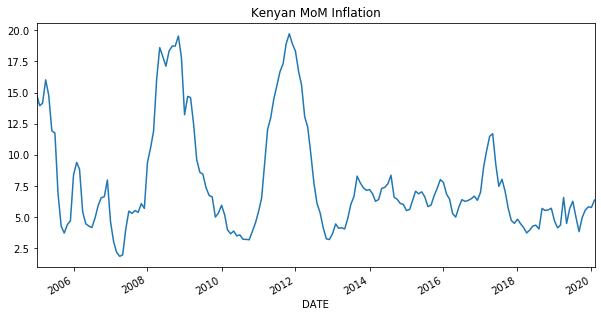

In [86]:
df2['Twelve_Month_Inflation'].plot(figsize = (10,5))
plt.title('Kenyan MoM Inflation')
plt.show;
#can also help locate outliers

Covariance and correlation

In [87]:
df2.cov()

,Month,Annual_Average_Inflation,Twelve_Month_Inflation
Month,12.092836,-0.247713,-0.898704
Annual_Average_Inflation,-0.247713,13.278366,9.731744
Twelve_Month_Inflation,-0.898704,9.731744,18.868017


In [88]:
df2.corr()

,Month,Annual_Average_Inflation,Twelve_Month_Inflation
Month,1.000000,-0.019548,-0.059496
Annual_Average_Inflation,-0.019548,1.000000,0.614830
Twelve_Month_Inflation,-0.059496,0.614830,1.000000
